In [9]:
from pandas_datareader import data 
from datetime import datetime
import matplotlib.pyplot as plt

# 1.5 최대 손실 낙폭 구하기

In [4]:
start_date = datetime(2000, 1, 1)
end_date = datetime(2022, 9, 5)
kospi = data.get_data_yahoo("^KS11", start_date, end_date)
kospi

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-04,1066.180054,1016.590027,1028.329956,1059.040039,195900.0,1059.040039
2000-01-05,1026.520020,984.049988,1006.869995,986.309998,257700.0,986.309998
2000-01-06,1014.900024,953.500000,1013.950012,960.789978,203500.0,960.789978
2000-01-07,970.159973,930.840027,949.169983,948.650024,215700.0,948.650024
2000-01-10,994.940002,974.820007,979.669983,987.239990,240200.0,987.239990
...,...,...,...,...,...,...
2022-08-30,2453.909912,2433.479980,2441.209961,2450.929932,336200.0,2450.929932
2022-08-31,2473.750000,2426.139893,2433.469971,2472.050049,435900.0,2472.050049
2022-09-01,2443.610107,2415.610107,2443.000000,2415.610107,579300.0,2415.610107


In [6]:
# 365중에서 주식 시장이 열리는 날을 개략적으로 계산(공휴일, 주말 제외)
window = 252 

# 각 1년마다의 주가의 고점 찾기
peak = kospi['Adj Close'].rolling(window, min_periods=1).max() 

# 모든 낙폭 구하기
drawdown = kospi['Adj Close']/peak - 1.0 

#최대 손실 낙폭(mdd)
# 1년마다의 최대 손실 낙폭 구해주기
mdd = drawdown.rolling(window, min_periods=1).min() 

In [7]:
mdd

Date
2000-01-04    0.000000
2000-01-05   -0.068675
2000-01-06   -0.092773
2000-01-07   -0.104236
2000-01-10   -0.104236
                ...   
2022-08-30   -0.306546
2022-08-31   -0.306546
2022-09-01   -0.306546
2022-09-02   -0.306546
2022-09-05   -0.306546
Name: Adj Close, Length: 5593, dtype: float64

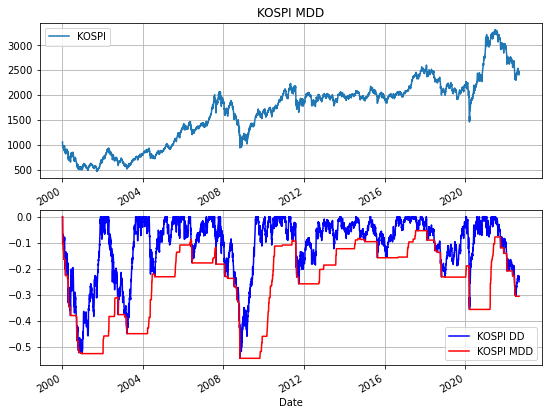

In [10]:
plt.figure(figsize=(9,7))
plt.subplot(211) # 2행 1열 중에 1행에 그리겠다.
kospi['Close'].plot(label='KOSPI', title='KOSPI MDD', grid=True, legend=True) #코스피 그래프
plt.subplot(212) # 2행 1열 중에 2행에 그리겠다.
drawdown.plot(c='blue', label='KOSPI DD', grid=True, legend=True) # 낙폭 그래프
mdd.plot(c='red', label='KOSPI MDD', grid=True, legend=True) # 최대 손실 낙폭 그래프
plt.show() #그래프 출력


- 빨간선 : 과거 1년 사이의 최대 낙폭

# 최대 손실 낙폭을 통해 금융 위기 살펴보기 ( MDD가 -30% 이하인 경우) 찾는 코드 작성
